# Single Particle Simulation


Simulate the trajectory of a particle in a perfectly circular flow (i.e.
_solid body rotation_), which may represent e.g. an ocean meso-scale eddy.
_Addendum: _ a homogeneous sinking / floating term was later added.

![solid body rotation](https://github.com/JuliaClimate/IndividualDisplacements.jl/raw/master/examples/figs/SolidBodyRotation.gif)

As an exercise left to the user, directions are provided e.g. to add a convergence / divergence term.
For additional documentation e.g. see :
[1](https://JuliaClimate.github.io/IndividualDisplacements.jl/dev/),
[2](https://JuliaClimate.github.io/MeshArrays.jl/dev/),
[3](https://docs.juliadiffeq.org/latest/solvers/ode_solve.html),
[4](https://en.wikipedia.org/wiki/Displacement_(vector))

- setup the software and initialize example
- simulate trajectories & plot results
- experiment with parameters (user)

## 1.1 Import Software

In [1]:
using OrdinaryDiffEq, Plots, DataFrames
using IndividualDisplacements, MeshArrays

## 1.2  Gridded Domain

In [2]:
np,nz=16,4 #horizontal and vertical domain size
Γ=simple_periodic_domain(np)
γ=Γ["XC"].grid;

## 1.3 Velocity Fields

In [3]:
#Solid-body rotation around central location ...
i=Int(np/2+1)
u=-(Γ["YG"].-Γ["YG"][1][i,i])
v=(Γ["XG"].-Γ["XG"][1][i,i])

#... plus a convergent term to / from central location
d=-0.01
u=u+d*(Γ["XG"].-Γ["XG"][1][i,i])
v=v+d*(Γ["YG"].-Γ["YG"][1][i,i])

#Replicate u,v in vertical dimension
uu=MeshArray(γ,γ.ioPrec,nz)
[uu[k]=u[1] for k=1:nz]
vv=MeshArray(γ,γ.ioPrec,nz)
[vv[k]=v[1] for k=1:nz]

#Vertical velocity component w
w=fill(1.0,MeshArray(γ,γ.ioPrec,nz))

#store parameters in a NamedTuple
𝑃=(u0=uu, u1=uu, v0=vv, v1=vv,w0=0.0*w, w1=-0.01*w, 𝑇=[0,19.95*2*pi], ioSize=(np,np,nz));

## 1.4 Initial Position

In [4]:
xy=[np*1/3,np*1/3,nz*1/3]

3-element Array{Float64,1}:
 5.333333333333333 
 5.333333333333333 
 1.3333333333333333

## 2.1 Solve For Particle Trajectory

In [5]:
tr = DataFrame( ID=[], x=[], y=[], z=[], t = [])
solv(prob) = solve(prob,Tsit5(),reltol=1e-8)
function postproc(sol,𝑃::NamedTuple,id=missing)
    df=postprocess_xy(sol,𝑃,id)
    #add third coordinate
    z=sol[3,:,:]
    df.z=z[:]
    return df
 end

𝐼 = Individuals{Float64}(xy=xy[:,:], 𝑃=𝑃, ⎔! = dxyz_dt, □ = solv, ▽ = postproc, tr = tr)
start!(𝐼)

3×1 Array{Float64,2}:
 7.767441577479032 
 9.513402495574852 
 0.7065855989421701

## 2.2 Visualize Particle Trajectory

- define `myplot` convenience function
- generate animation using `myplot`
- single plot example using `myplot`

In [6]:
x,y,z=𝐼.tr.x,𝐼.tr.y,𝐼.tr.z

myplot(i)=plot(x[1:i],y[1:i],z[1:i],linewidth=2,arrow = 2,
    title="Solid body rotation / Spiral example",leg=false,
    xaxis="x",yaxis="y",zaxis="z",xlims=(0,np),ylims=(0,np))

myplot (generic function with 1 method)

Animation example:

/home/travis/.julia/packages/GR/yMV3y/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/travis/.julia/packages/GR/yMV3y/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/travis/.julia/packages/GR/yMV3y/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't conne

Plots.AnimatedGif("/tmp/SolidBodyRotation.gif")
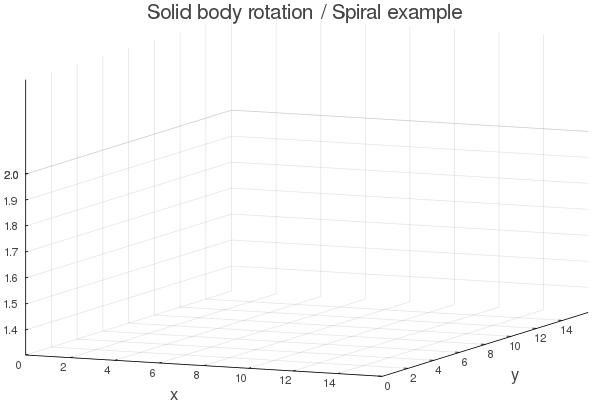

In [7]:
nt=length(x)
p=Int(ceil(nt/100))
anim = @animate for i ∈ 1:p:nt
    myplot(i)
end
pth=tempdir()*"/"
gif(anim, pth*"SolidBodyRotation.gif", fps = 15)

Single plot example:

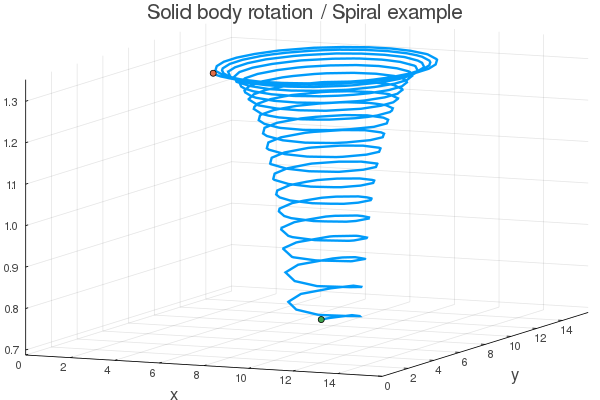

In [8]:
plt=myplot(nt)
scatter!(plt,[xy[1]],[xy[2]],[xy[3]])
scatter!(plt,[x[end]],[y[end]],[z[end]])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*